<a href="https://colab.research.google.com/github/Rudraashish7/Capstone-Project-SupervisedML-Regression-Yes-Bank-Stock-Closing-Price-Prediction/blob/main/Yes_Bank_Stock_Closing_Price_Prediction_capstone_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -



##### **Project Type**    - Regression
##### **Contribution**    - Team
##### **Team Member 1 -**
##### **Team Member 2 -**


# **Project Summary -**

Yes Bank is a well-known bank in the Indian financial domain. Since 2018, it has been in the news because of the fraud case involving Rana Kapoor. Owing to this fact, it was interesting to see how that impacted the stock prices of the company and whether Time series models or any other predictive models can do justice to such situations. This dataset has monthly stock prices of the bank since its inception and includes closing, starting, highest, and lowest stock prices of every month.
Our main objective is to predict the stock’s closing price of the month.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Write Problem Statement Here.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [5]:
# Import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
from datetime import datetime
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import Lasso

### Dataset Loading

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
# Load Dataset
stock_df = pd.read_csv("/content/drive/MyDrive/capstone project-Supervised ML-Regression/Data File /data_YesBank_StockPrices (1).csv")

### Dataset First View

In [8]:
# Dataset First Look
# viewing first 5 data set
stock_df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [9]:
stock_df.shape

(185, 5)

In [10]:
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


In [11]:
# Checking for null values.
stock_df.isna().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

In [12]:
# getting descriptive statistics of the data.
stock_df.describe(include='all')

,Date,Open,High,Low,Close
count,185,185.000000,185.000000,185.000000,185.000000
unique,185,NaN,NaN,NaN,NaN
top,Jul-05,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN
mean,NaN,105.541405,116.104324,94.947838,105.204703
std,NaN,98.879850,106.333497,91.219415,98.583153
min,NaN,10.000000,11.240000,5.550000,9.980000
25%,NaN,33.800000,36.140000,28.510000,33.450000
50%,NaN,62.980000,72.550000,58.000000,62.540000
75%,NaN,153.000000,169.190000,138.350000,153.300000


In [13]:
# Let us now preserve the original data before we operate on it.
preserved_stock_data = stock_df.copy()

In [14]:
# Checking for duplicate instances.
stock_df[stock_df.duplicated()==True]

,Date,Open,High,Low,Close


In [15]:
# So there is no duplicate data in our dataframe.
# checking the datatypes once more.
stock_df.dtypes

Date      object
Open     float64
High     float64
Low      float64
Close    float64
dtype: object

In [16]:
# as we can see, Date column has the object datatype.
stock_df['Date']

0      Jul-05
1      Aug-05
2      Sep-05
3      Oct-05
4      Nov-05
        ...  
180    Jul-20
181    Aug-20
182    Sep-20
183    Oct-20
184    Nov-20
Name: Date, Length: 185, dtype: object

The dataset contains various features that provide information about the monthly stock prices of Yes Bank. These features offer valuable insights and details about the stock performance.:-

*   `Date` :- The dataset includes the date information in the format of month and year, indicating the specific time period for which the stock prices of Yes Bank are recorded.
*   `Open` :- The dataset includes the initial stock price at the start of a specific time period.
*   `High` :- The dataset captures the highest price at which the stock traded during the given period, also known as the peak or maximum price.
*   `Low` :- The dataset records the lowest price at which the stock traded during the specified period, often referred to as the minimum or bottom price.
*   `Close` :- The dataset includes the closing trading price, specifically at the end of each month.




# After conducting an analysis of the dataset, we can draw several conclusions based on the findings.



*   The dataset is structured with five distinct features, each providing valuable information about the data points. In total, there are 185 data points available for analysis, allowing for a comprehensive examination of the dataset.
*   The dataset is free from any null or missing data points, indicating that all the required information is available for analysis. This absence of null data ensures the reliability and completeness of the dataset, enabling accurate and comprehensive exploration of the provided information.
*   Among the columns in the dataset, only the "Date" feature is represented as an object/string datatype. This means that the dates are stored as text rather than numerical values. The remaining features are likely represented as numerical data types, such as integers or floats. The inclusion of the "Date" feature allows for temporal analysis and tracking of the stock prices over time.



# Data Wrangling

After thoroughly examining the dataset, we have determined that it contains no null or duplicate values, indicating its overall data integrity. However, there is a need to address the "Date" feature, which is currently stored as an object datatype. In order to utilize the dataset effectively across various models and actions, it is necessary to convert the "Date" feature to a proper datetime data type. Additionally, setting the "Date" feature as the index will enable easier manipulation and analysis of the dataset, ensuring its compatibility with different modeling techniques and actions.

In [17]:
# we need to modify this before passing it to a model.
# lets convert Date column to a proper datetime datatype.
stock_df['Date'] = pd.to_datetime(stock_df['Date'].apply(lambda x: datetime.strptime(x, '%b-%y')))     # this converts date to a yyyy-mm-dd format.

In [18]:
# rechecking the dataset
stock_df.head()

,Date,Open,High,Low,Close
0,2005-07-01,13.00,14.00,11.25,12.46
1,2005-08-01,12.58,14.88,12.55,13.42
2,2005-09-01,13.48,14.87,12.27,13.30
3,2005-10-01,13.20,14.47,12.40,12.99
4,2005-11-01,13.35,13.88,12.88,13.41



Given our objective of tracking variations in stock prices across different dates, it is logical to set the "Date" column as the index of the dataset. By doing so, we can easily access and analyze the stock price data based on specific dates. This indexing approach allows us to efficiently navigate and retrieve information, facilitating a comprehensive understanding of the stock price fluctuations over time.

In [19]:
stock_df.set_index('Date', inplace=True)           # setting Date column as index.

In [20]:
# checking the data.
stock_df.head()

,Open,High,Low,Close
Date,,,,
2005-07-01,13.00,14.00,11.25,12.46
2005-08-01,12.58,14.88,12.55,13.42
2005-09-01,13.48,14.87,12.27,13.30
2005-10-01,13.20,14.47,12.40,12.99
2005-11-01,13.35,13.88,12.88,13.41


Upon examining the dataframe provided above, it is evident that all the columns exclusively consist of numerical data. There is an absence of any categorical data in the dataset. This means that the information available for analysis primarily comprises quantitative values, allowing for numerical calculations, statistical analyses, and modeling techniques to be applied directly to the dataset. The lack of categorical data simplifies the data processing and ensures a streamlined approach when performing quantitative analyses.

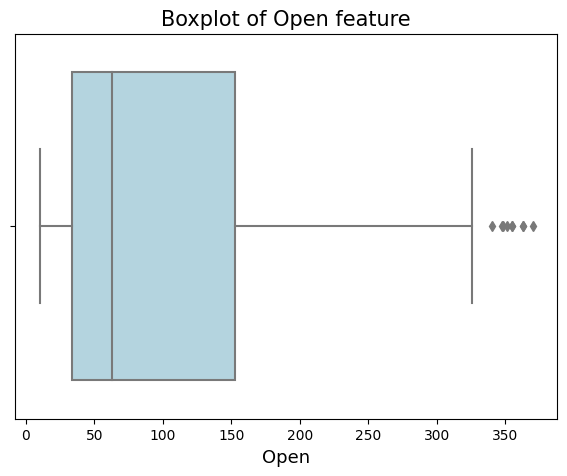

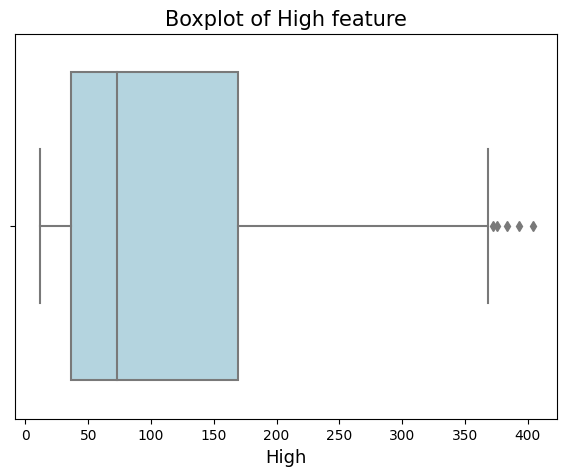

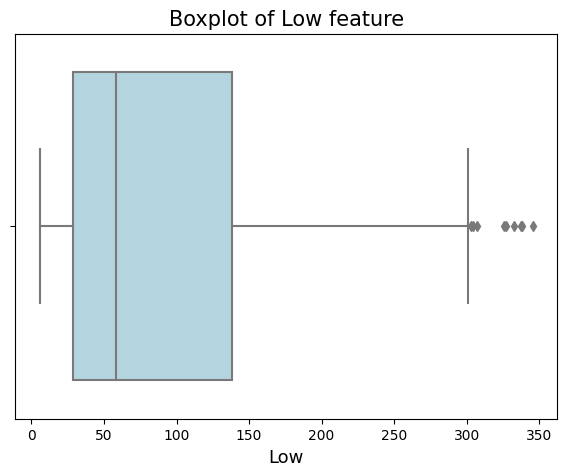

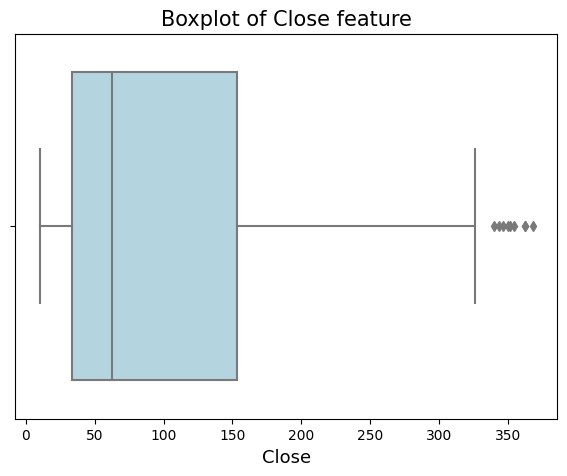

In [21]:
# Checking all features for presence of outliers.
for col in stock_df.columns:
  fig, ax = plt.subplots(figsize=(7, 5))
  sns.boxplot(x=stock_df[col], ax=ax, color='lightblue')
  ax.set_xlabel(col, fontsize=13)
  ax.set_title(f"Boxplot of {col} feature", fontsize=15)
  plt.show()

Upon observation, it is evident that our dataset contains outliers. These outliers are data points that significantly deviate from the majority of the data. Before proceeding with modeling or further analysis, it is essential to address these outliers. Dealing with outliers involves identifying their impact on the data and deciding on an appropriate course of action, such as removing or transforming them. By addressing the outliers, we can ensure the robustness and reliability of our models and analyses.

# Now let's perform Exploratory Data Analysis(EDA)

In [22]:
# Separating the dependent and independent variables.
# Get the list of independent variables and the dependent variable from the stock_df dataframe.
independent_variables = stock_df.columns[:-1].tolist() # Get all columns except the last one
dependent_variable = ['Close'] # The target variable for prediction is 'Close'

# Print the list of independent variables and the dependent variable.
print("Independent Variables:", independent_variables)
print("Dependent Variable:", dependent_variable)

Independent Variables: ['Open', 'High', 'Low']
Dependent Variable: ['Close']


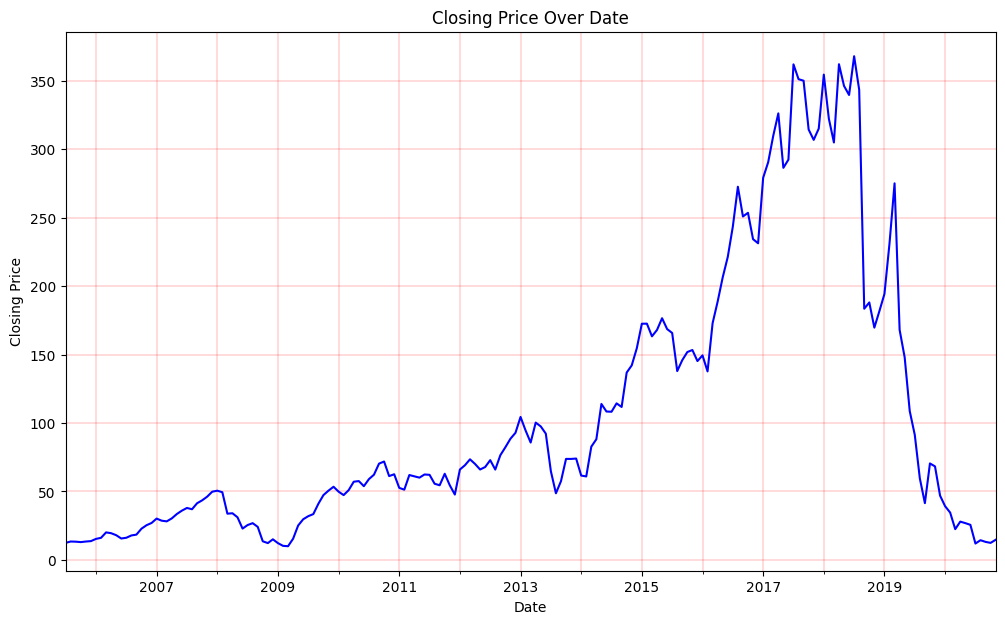

In [23]:
# Plotting the dependent variable (Closing Price)

plt.figure(figsize=(12, 7)) # Setting the figure size

stock_df['Close'].plot(color='b') # Ploting the 'Close' column from stock_df dataframe

plt.grid(which='both', linestyle='-', linewidth='0.2', color='red') # Adding gridlines to the plot
plt.xlabel('Date') # Setting the x-axis label
plt.ylabel('Closing Price') # Setting the y-axis label
plt.title('Closing Price Over Date') # Setting the title of the plot

plt.show() # Displaying the plot

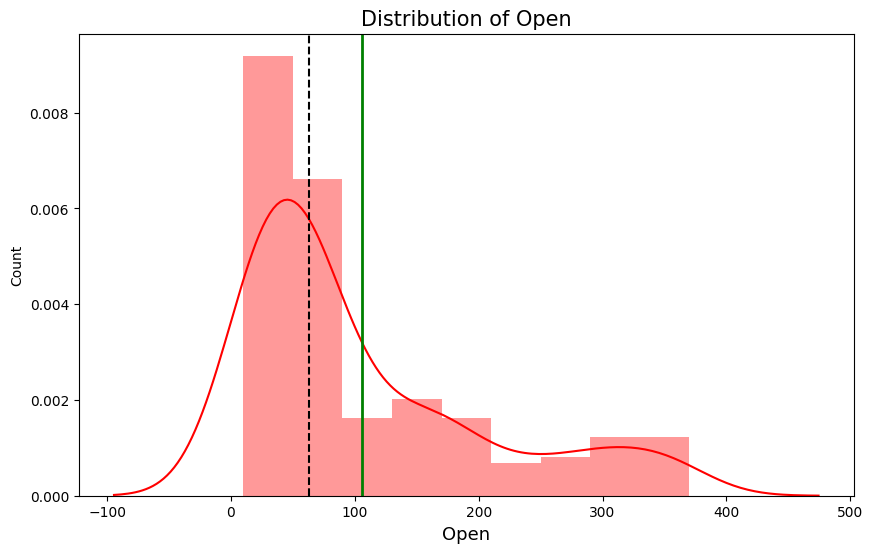

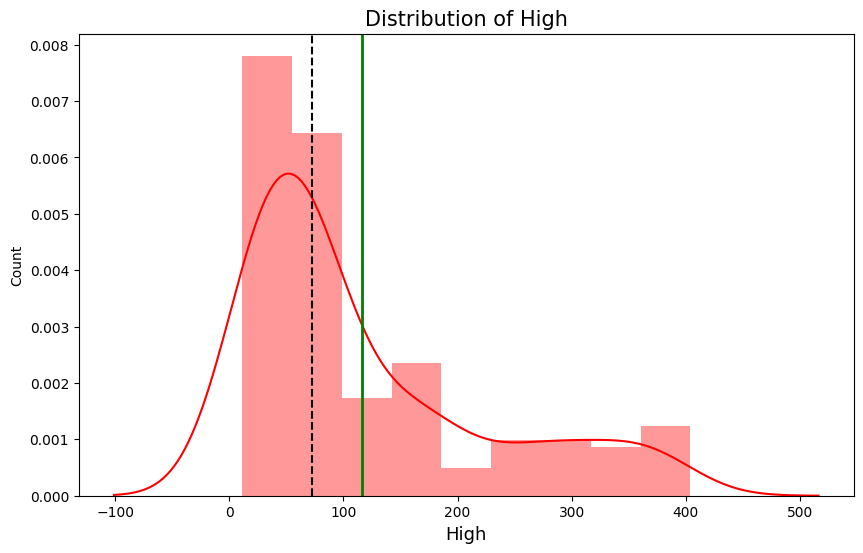

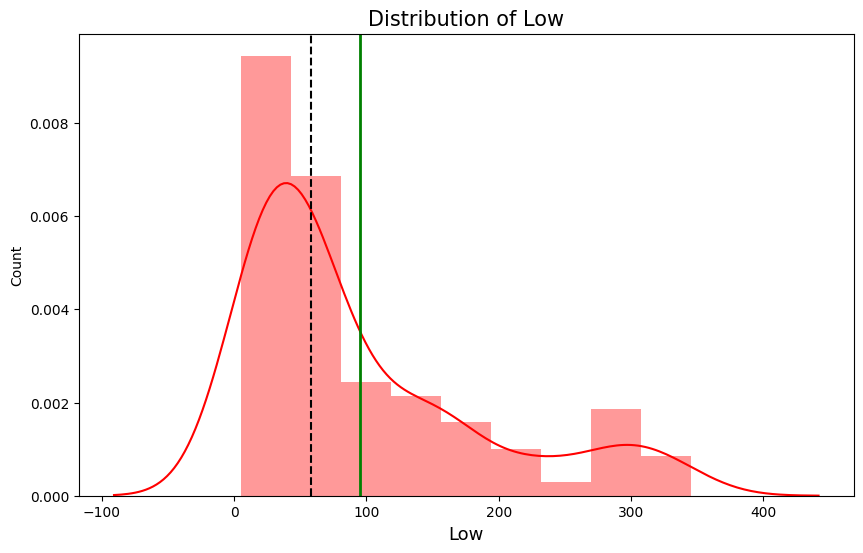

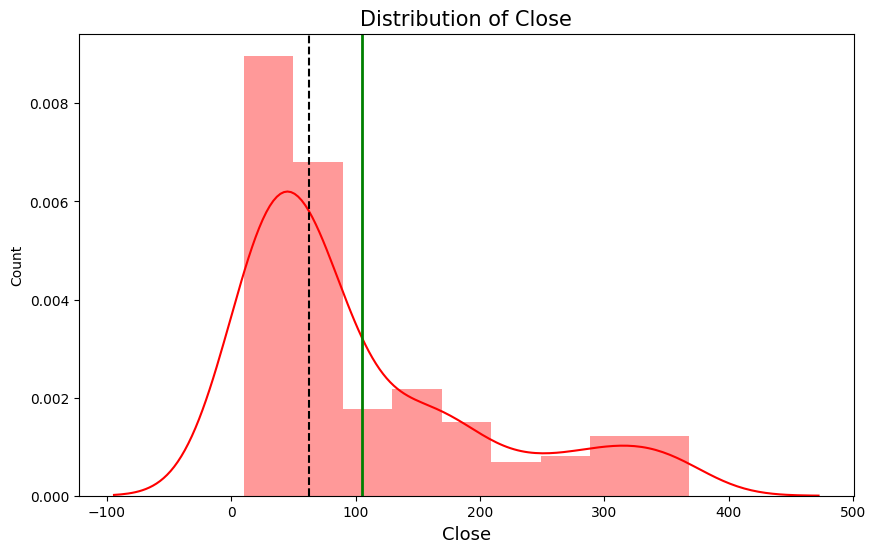

In [24]:
# Plotting the distributions of all features.
for col in stock_df.columns:
  plt.figure(figsize=(10, 6)) # Set the figure size
  # Plot the distribution using a histogram and kernel density estimation
  sns.distplot(stock_df[col], color='r', kde = True)

  plt.xlabel(col, fontsize=13)  # Set the x-axis label
  plt.ylabel('Count')  # Set the y-axis label

  # Plotting the mean and median as vertical lines
  plt.axvline(stock_df[col].mean(), color='green', linewidth=2)  # Mean line in green
  plt.axvline(stock_df[col].median(), color='black', linestyle='dashed', linewidth=1.5)  # Median line in red with dashed style
  plt.title(f"Distribution of {col}", fontsize=15) # Set the title of the graph
  plt.show()

Upon analyzing the distributions, it is evident that they exhibit positive skewness, indicated by the longer tail on the right side. The noticeable difference between the mean and median further emphasizes this skewness. In order to achieve optimal results with our models, it is crucial to transform these distributions to approximate a normal distribution.

To accomplish this, we can apply various transformation techniques such as logarithmic, square root, or Box-Cox transformations. These transformations aim to normalize the data by reducing the impact of skewness and aligning the distribution closer to a normal distribution. By doing so, we can enhance the performance of our models, as many statistical techniques assume normality for accurate and reliable predictions.

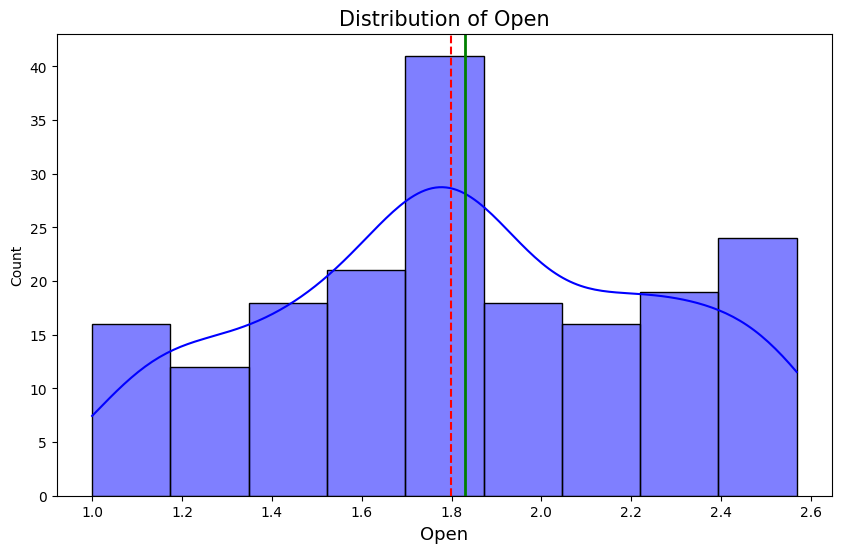

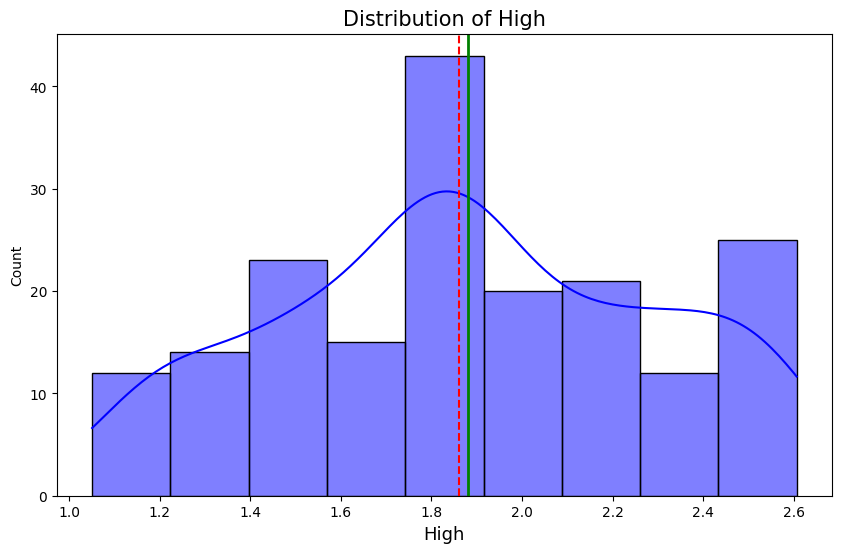

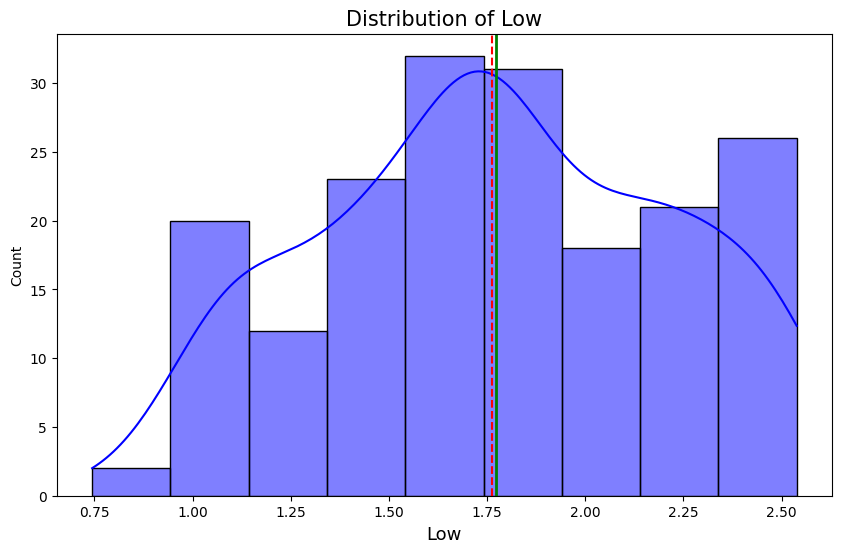

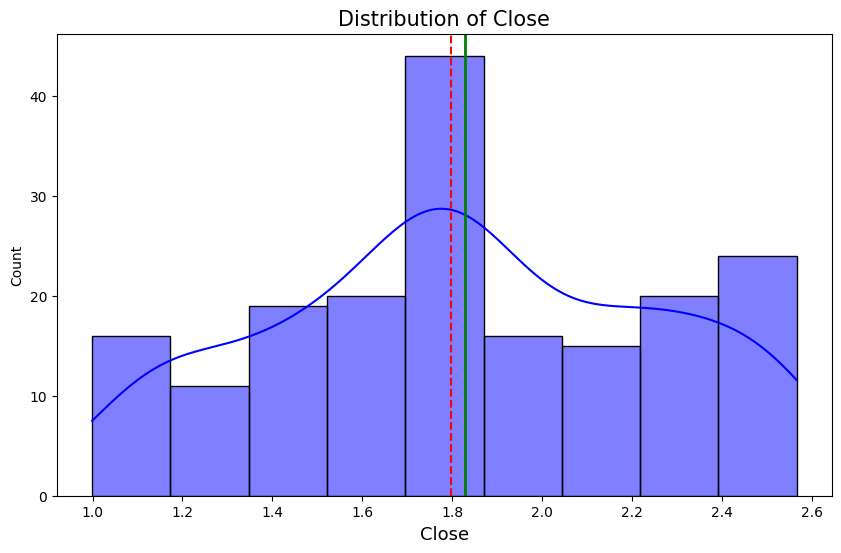

In [25]:
# Apply log transformation on the features and plot the transformed distributions
for col in stock_df.columns:
  plt.figure(figsize=(10, 6)) # Set the figure size
  # Plot the distribution of the log-transformed feature using a histogram and kernel density estimation
  sns.histplot(np.log10(stock_df[col]), color='b', kde=True)

  plt.xlabel(col, fontsize=13)  # Set the x-axis label
  plt.ylabel('Count')  # Set the y-axis label

  # Plotting the mean and median of the log-transformed feature as vertical lines
  plt.axvline(np.log10(stock_df[col]).mean(), color='green', linewidth=2)  # Mean line in green
  plt.axvline(np.log10(stock_df[col]).median(), color='red', linestyle='dashed', linewidth=1.5)  # Median line in red with dashed style
  plt.title(f"Distribution of {col}", fontsize=15) # Set the title of the graph
  plt.show()


After applying the logarithmic transformation to the features, we can observe that the distributions have become much closer to a normal distribution. The shapes of the distributions have been improved, and the skewness has been reduced significantly.

Furthermore, the mean and median values of the transformed features are now much closer to each other. This suggests that the data points are more symmetrically distributed around the central tendency. The similarity between the mean and median values indicates a better alignment of the distribution towards normality.

These transformed distributions provide a more suitable foundation for our models as they exhibit characteristics that are closer to the assumptions made by many statistical techniques. This normalization process enhances the reliability and accuracy of our models, leading to optimal results in data analysis and predictions.

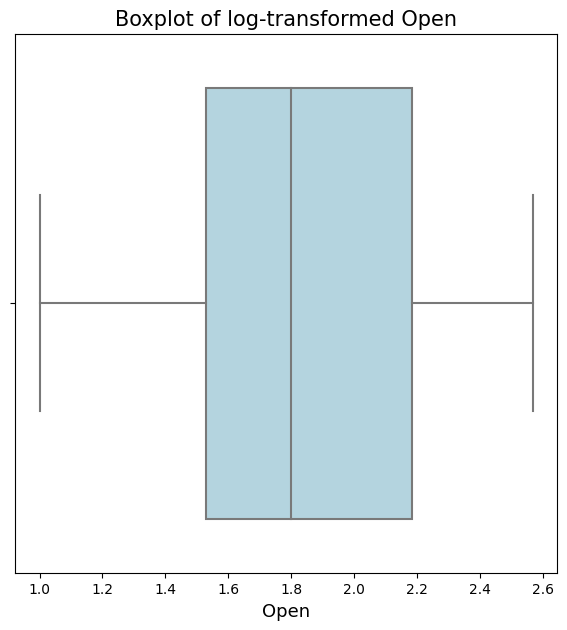

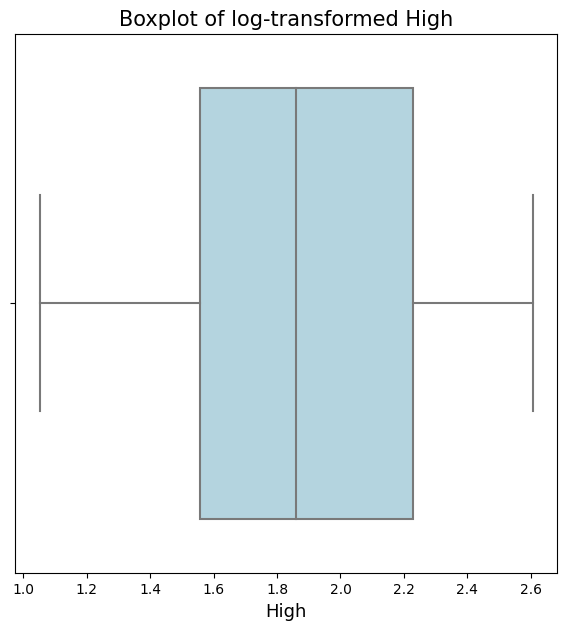

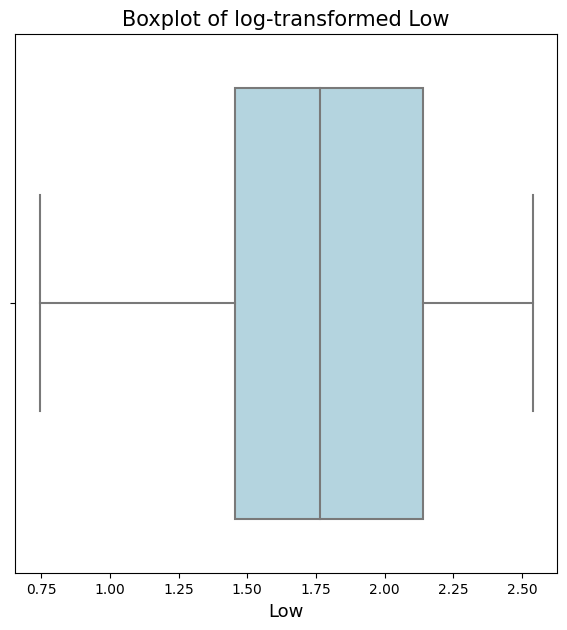

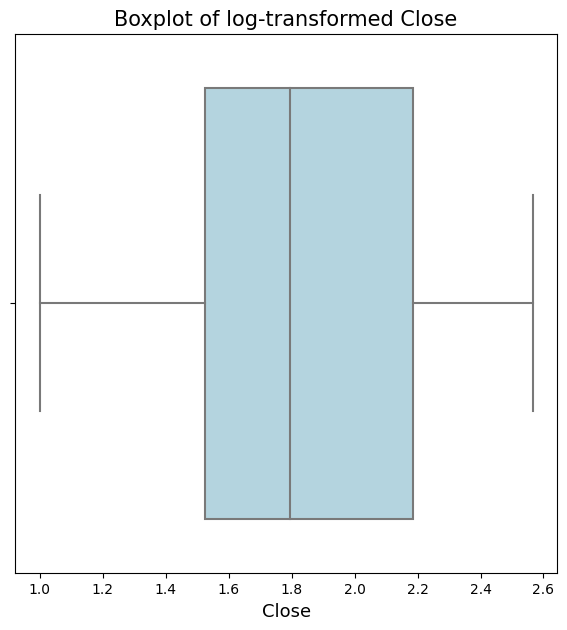

In [26]:
# Check for outliers in the transformed variable data
for col in stock_df.columns:
  plt.figure(figsize=(7, 7)) # Set the figure size
  sns.boxplot(x=np.log10(stock_df[col]), color='lightblue') # Boxplot of the log-transformed variable with light blue color
  plt.xlabel(col, fontsize=13) # Set the x-axis label
  plt.title(f"Boxplot of log-transformed {col}", fontsize=15) # Set the title of the graph
  plt.show()

After applying the log transformation, we can observe that the presence of outliers has diminished significantly. The log transformation helps reduce the impact of outliers on the data by compressing the values towards the center of the distribution.

However, considering the small size of our dataset, completely dropping the outliers is not advisable. With limited data points, removing outliers may result in a loss of valuable information and potentially bias our analysis. Therefore, it is prudent to retain the outliers in our dataset and proceed with the analysis as they can still provide important insights and contribute to the overall understanding of the data.

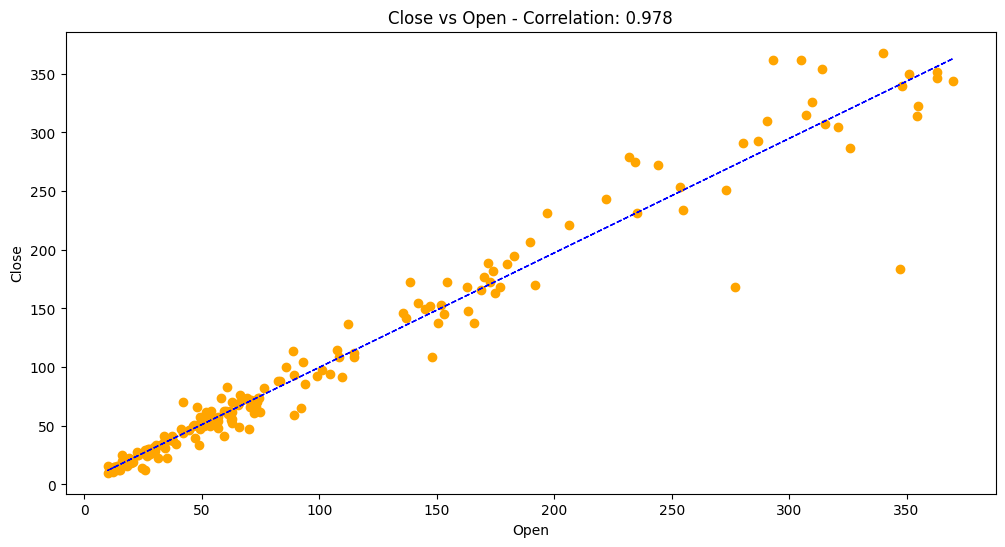

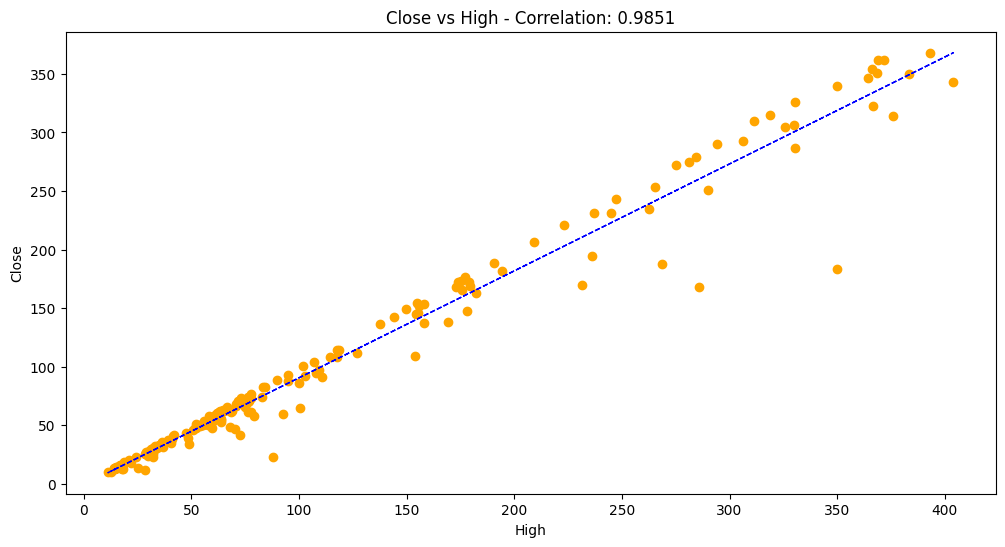

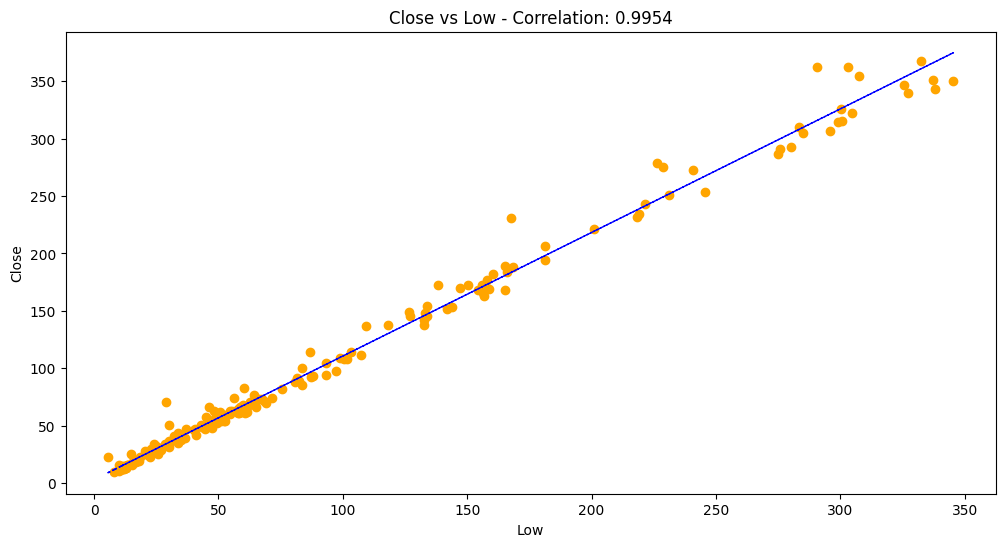

In [27]:
# Plotting the independent variables against dependent variable close and also checking the correlation between them.
for col in independent_variables:
  fig, ax = plt.subplots(figsize=(12, 6))
  feature = stock_df[col]
  label = stock_df['Close']
  correlation = feature.corr(label) # Calculating the correlation between the independent variable and 'Close'
  ax.scatter(x=feature, y=label,color='orange') # Plotting the independent variable against 'Close'
  # Setting the x-label, y-label, and title
  ax.set_xlabel(col)
  ax.set_ylabel('Close')
  ax.set_title('Close vs ' + col + ' - Correlation: ' + str(round(correlation, 4)))

  # Fitting a linear regression line
  z = np.polyfit(stock_df[col], stock_df['Close'], 1)
  y_hat = np.poly1d(z)(stock_df[col])
  ax.plot(stock_df[col], y_hat, "r--",color='blue', lw=1)

plt.show()

Upon analyzing the plots, it is evident that all of the independent variables exhibit a strong correlation with the dependent variable ('Close'). This indicates a significant relationship between the independent and dependent variables in our dataset.

Furthermore, the relationship between the dependent variable and independent variables appears to be linear in nature. This suggests that a linear regression model might be suitable for capturing and predicting the relationship between these variables. The linear regression line fitted in each plot reinforces the linear trend observed between the variables.

The high correlations and linear relationships observed in the plots imply that the independent variables hold valuable predictive power for determining the dependent variable ('Close'). These findings contribute to our understanding of the dataset and provide insights for selecting appropriate modeling techniques.

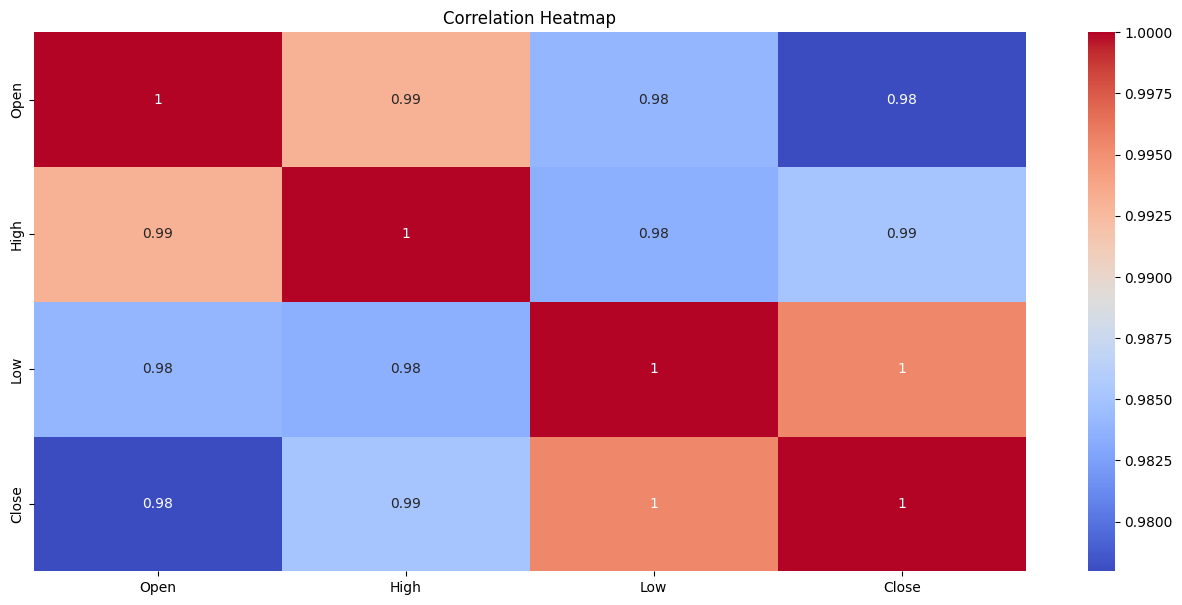

In [28]:
# Calculate the correlation matrix
corr = stock_df.corr()

plt.figure(figsize=(16, 7)) # Set the figure size

# Create a heatmap of the correlation matrix
sns.heatmap(corr, annot=True, cmap='coolwarm')

plt.title('Correlation Heatmap') # Set the title of the heatmap

plt.show()

Upon examining the heatmap, it becomes evident that there exists a significant degree of correlation between each pair of features in our dataset. While a high correlation between the dependent variable and independent variables is desirable for effective prediction, it is equally important to avoid high correlations among the independent variables themselves.

The presence of high correlation among independent variables, known as multicollinearity, poses a challenge for our models. Multicollinearity can lead to issues such as unstable coefficient estimates, difficulty in determining the individual impact of each variable, and reduced model interpretability.

In our case, the observed high correlation between independent variables indicates a potential multicollinearity issue. This calls for appropriate measures to address multicollinearity, such as feature selection, dimensionality reduction, or transforming variables to reduce correlation.

By addressing multicollinearity, we can enhance the effectiveness and interpretability of our models and improve the accuracy of our predictions.

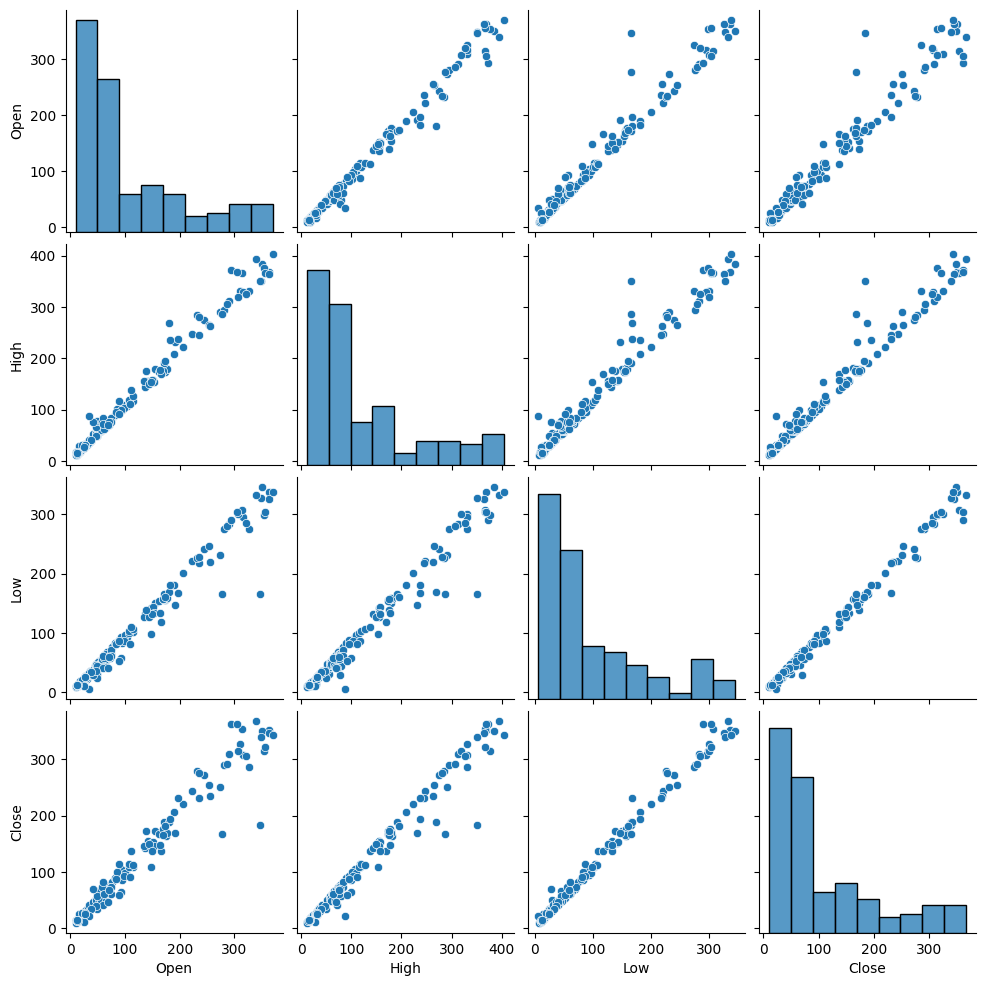

In [29]:
# Let's visualise the relationship between each pair of variables using pair plots.
sns.pairplot(stock_df)

# Data Preprocessing

In [30]:
# Dealing with multicollinearity using VIF analysis.
# Calculating VIF(Variation Inflation Factor) to see the correlation between independent variables

# Calculate the VIF (Variance Inflation Factor) for each independent variable
X = stock_df[[col for col in stock_df.describe().columns if col not in ['Date', 'Close']]]
vif = pd.DataFrame()
vif["Feature"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

  Feature         VIF
0    Open  175.185704
1    High  167.057523
2     Low   71.574137


Upon analyzing the VIF (Variance Inflation Factor) values, it is apparent that the values are quite high. However, it is important to note that our dataset is relatively small and contains only three independent features. In such cases, multicollinearity can become unavoidable due to the limited number of variables.

Attempting feature engineering or applying transformations to address multicollinearity in this small dataset could result in a loss of valuable information. It is crucial to strike a balance between addressing multicollinearity and preserving the integrity of the data.

While it is desirable to mitigate multicollinearity whenever possible, the small size of the dataset limits our options in terms of feature selection or dimensionality reduction techniques. In such situations, it becomes necessary to carefully interpret the model results, considering the potential impact of multicollinearity on coefficient estimates and model performance.

Given the constraints of the dataset, it is important to acknowledge the presence of multicollinearity and proceed with model development while being cautious of its potential implications.

In [31]:
# Creating arrays of our input variable and label to feed the data to the model.
# Create the data of independent variables
x = np.log10(stock_df[independent_variables]).values            # applying log transform on our independent variables.

# Create the dependent variable data
y = np.log10(stock_df[dependent_variable]).values               # applying log transform on our dependent variable.

In [32]:
# splitting the data into a train and a test set. we do this using train test split.

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)       # we keep 20% of the data in test set.

In our case, scaling the data is crucial to prevent features with large values from dominating the modeling process. This can be achieved through the process of normalization or standardization, which helps to bring the features to a comparable scale.

Normalization involves rescaling the features to a range between 0 and 1, preserving the relative relationships between the data points. This is useful when the distribution of the data is not necessarily Gaussian.

On the other hand, standardization transforms the data to have a mean of 0 and a standard deviation of 1. It ensures that the features have zero mean and unit variance, making them more directly comparable and suitable for techniques that assume Gaussian distribution.

By scaling the data, we ensure that each feature is given equal importance and prevents any undue influence from features with larger magnitudes. This facilitates more effective modeling and enables reliable comparisons between the variables.

It is important to consider the specific characteristics of the data and the requirements of the modeling techniques in order to choose the appropriate scaling method, either normalization or standardization, for our dataset.

In [33]:
# Scaling the data.
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [34]:
# checking the values.
x_train[0:5]

array([[ 0.83311596,  0.8243388 ,  0.88445745],
       [-1.41735108, -1.31675483, -1.23862182],
       [ 0.3871812 ,  0.35973888,  0.04241403],
       [-0.06900104,  0.01215654, -0.30051561],
       [-1.91321118, -1.50865163, -1.71568543]])

# Appling Linear regression

In [35]:
# Initializing the model.
model_lr = LinearRegression()

# Fitting the model on our train data.
model_lr.fit(x_train, y_train)

LinearRegression()

In [36]:
# Predicting on our test data.
y_pred_linear = model_lr.predict(x_test)

In [37]:
# Checking the model parameters. printing the intercept.
model_lr.intercept_

array([1.79986471])

In [38]:
# printing the model coefficients.
model_lr.coef_

array([[-0.22992597,  0.33533242,  0.31585415]])

In [39]:
# Calculating the performance metrics.
MAE_linear = round(mean_absolute_error(10**(y_test),(10**y_pred_linear)),4)
print(f"Mean Absolute Error : {MAE_linear}")

MSE_linear = round(mean_squared_error((10**y_test),10**(y_pred_linear)),4)
print(f"Mean squared Error : {MSE_linear}")

RMSE_linear = round(np.sqrt(MSE_linear),4)
print(f"Root Mean squared Error : {RMSE_linear}")

R2_linear = round(r2_score(10**(y_test), 10**(y_pred_linear)),4)
print(f"R2 score : {R2_linear}")

Adjusted_R2_linear = round(1-(1-r2_score(10**y_test,10**y_pred_linear))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)),3)
print(f"Adjusted R2 score : {Adjusted_R2_linear}")


Mean Absolute Error : 4.8168
Mean squared Error : 70.4204
Root Mean squared Error : 8.3917
R2 score : 0.9937
Adjusted R2 score : 0.993


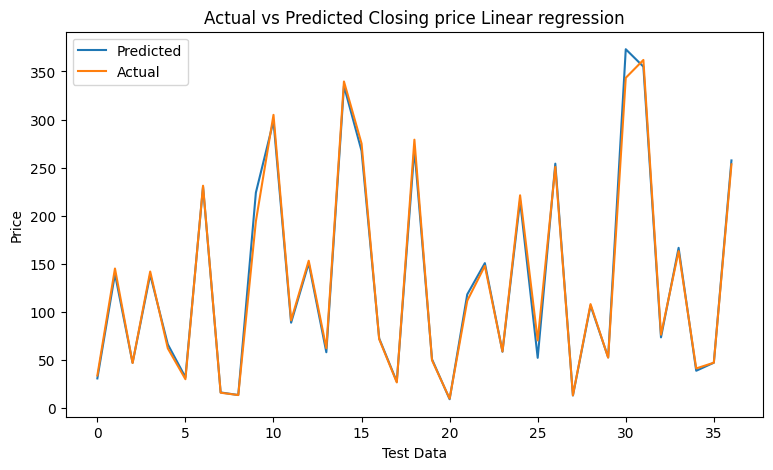

In [40]:
# Plotting the actual and predicted test data.
plt.figure(figsize=(9,5))
plt.plot(10**y_pred_linear)
plt.plot(np.array(10**y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('Test Data')
plt.ylabel("Price")
plt.title("Actual vs Predicted Closing price Linear regression")
plt.show()

Now we need to store our performance data for this model so that we can compare them with other models. Let's store them in a dict for now.

In [41]:
linear_regessor_list = {'Mean Absolute Error' : MAE_linear,'Mean squared Error' : MSE_linear,
                   'Root Mean squared Error' : RMSE_linear,'R2 score' : R2_linear,'Adjusted R2 score' : Adjusted_R2_linear }

In [42]:
# converting above dict into a dataframe
metric_df = pd.DataFrame.from_dict(linear_regessor_list, orient='index').reset_index()

In [43]:
# renaming the columns.
metric_df = metric_df.rename(columns={'index':'Metric',0:'Linear Regression'})
metric_df

,Metric,Linear Regression
0,Mean Absolute Error,4.8168
1,Mean squared Error,70.4204
2,Root Mean squared Error,8.3917
3,R2 score,0.9937
4,Adjusted R2 score,0.9930


We will now use this df to store all metrics of all other models so we can easily compare them.

# 2. Lasso Regression with cross validated regularization.

In [44]:
# Initializing the model with some base values.
lasso  = Lasso(alpha=0.0001 , max_iter= 3000)
# Fitting the model on our training data.
lasso.fit(x_train, y_train)

Lasso(alpha=0.0001, max_iter=3000)

In [45]:
# Printing the intercept and coefficients.
lasso.intercept_

array([1.79986471])

In [46]:
lasso.coef_

array([-0.2079326 ,  0.319775  ,  0.30927158])

In [47]:
# Cross validation. optimizing our model by finding the best value of our hyperparameter.
from sklearn.model_selection import GridSearchCV

lasso_param_grid = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,0.005,0.006,0.007,0.01,0.015,0.02,1e-1,1,5,10,20,30,40,45,50]}  # list of parameters.

lasso_regressor = GridSearchCV(lasso, lasso_param_grid, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(alpha=0.0001, max_iter=3000),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.005, 0.006, 0.007, 0.01, 0.015,
                                   0.02, 0.1, 1, 5, 10, 20, 30, 40, 45, 50]},
             scoring='neg_mean_squared_error')

In [48]:
# getting the best parameter
lasso_regressor.best_params_          # after several iterations and trials, we get this value as best parameter value.

{'alpha': 1e-05}

In [49]:
# getting the best score
lasso_regressor.best_score_

-0.0011530156671872803

In [50]:
# Predicting on the test dataset.
y_pred_lasso = lasso_regressor.predict(x_test)
print(y_pred_lasso)

[1.49138725 2.14480164 1.67440535 2.14228699 1.82187891 1.50772917
 2.36207529 1.21547491 1.13723019 2.35007689 2.4750589  1.94911733
 2.17805254 1.76496504 2.52500153 2.427082   1.86088626 1.44157089
 2.43007104 1.70654066 0.97170315 2.07286344 2.17847869 1.76889148
 2.33378329 1.71856753 2.40521703 1.1226477  2.02876294 1.72319367
 2.5717837  2.5499049  1.86710909 2.22199908 1.59040105 1.67512911
 2.41082202]


In [51]:
# checking the performance using evaluation metrics.
MAE_lasso = round(mean_absolute_error(10**(y_test),10**(y_pred_lasso)),4)
print(f"Mean Absolute Error : {MAE_lasso}")

MSE_lasso  = round(mean_squared_error(10**(y_test),10**(y_pred_lasso)),4)
print("Mean squared Error :" , MSE_lasso)

RMSE_lasso = round(np.sqrt(MSE_lasso),4)
print("Root Mean squared Error :" ,RMSE_lasso)

R2_lasso = round(r2_score(10**(y_test), 10**(y_pred_lasso)),4)
print("R2 score :" ,R2_lasso)

Adjusted_R2_lasso = round(1-(1-r2_score(10**y_test, 10**y_pred_lasso))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)),4)
print("Adjusted R2 score: ", Adjusted_R2_lasso)

Mean Absolute Error : 4.8262
Mean squared Error : 70.3311
Root Mean squared Error : 8.3864
R2 score : 0.9938
Adjusted R2 score:  0.9932


In [52]:
# Now saving these metrics to our metrics dataframe. First we save them in a list and then we pass them to the df.
metric_df['Lasso'] = [MAE_lasso, MSE_lasso, RMSE_lasso, R2_lasso, Adjusted_R2_lasso]

Text(0.5, 1.0, 'Actual vs Predicted Closing price Lasso regression')

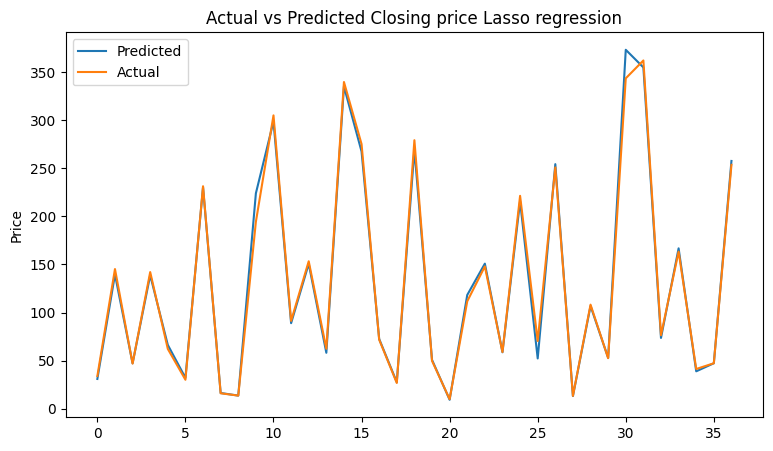

In [53]:
# plotting the predicted values vs actual.
plt.figure(figsize=(9,5))
plt.plot(10**y_pred_lasso)
plt.plot(np.array(10**y_test))
plt.legend(["Predicted","Actual"])
plt.ylabel("Price")
plt.title("Actual vs Predicted Closing price Lasso regression")

#3. Ridge Regression with cross validated regularization.

In [54]:
# importing ridge regressor model.
from sklearn.linear_model import Ridge
ridge = Ridge()         # iitializing the model

# initiating the parameter grid for alpha (regularization strength).
ridge_param_grid = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,0.3,0.7,1,1.2,1.33,1.365,1.37,1.375,1.4,1.5,1.6,1.8,2.5,5,10,20,30,40,45,50,55,60,100]}

# cross validation.
ridge_regressor = GridSearchCV(ridge, ridge_param_grid, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 0.3, 0.7, 1, 1.2, 1.33, 1.365, 1.37,
                                   1.375, 1.4, 1.5, 1.6, 1.8, 2.5, 5, 10, 20,
                                   30, 40, 45, 50, 55, 60, 100]},
             scoring='neg_mean_squared_error')

In [55]:
# finding the best parameter value (for alpha)
ridge_regressor.best_params_

{'alpha': 0.01}

In [56]:
# getting the best score for optimal value of alpha.
ridge_regressor.best_score_

-0.001306921437493189

In [57]:
# predicting on the test dataset now.
y_pred_ridge = ridge_regressor.predict(x_test)

In [58]:
# evaluating performance.
MAE_ridge = round(mean_absolute_error(10**(y_test),10**(y_pred_ridge)),4)
print(f"Mean Absolute Error : {MAE_ridge}")

MSE_ridge  = round(mean_squared_error(10**(y_test),10**(y_pred_ridge)),4)
print("Mean squared Error :" , MSE_ridge)

RMSE_ridge = round(np.sqrt(MSE_ridge),4)
print("Root Mean squared Error :" ,RMSE_ridge)

R2_ridge = round(r2_score(10**(y_test), 10**(y_pred_ridge)),4)
print("R2 score :" ,R2_ridge)

Adjusted_R2_ridge = round(1-(1-r2_score(10**y_test, 10**y_pred_ridge))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)),4)
print("Adjusted R2 score: ", Adjusted_R2_ridge)

Mean Absolute Error : 4.8334
Mean squared Error : 70.2641
Root Mean squared Error : 8.3824
R2 score : 0.9938
Adjusted R2 score:  0.9932


In [59]:
# storing these values in a list and appending to our metric df.
ridge_regressor_list = [MAE_ridge,MSE_ridge,RMSE_ridge,R2_ridge,Adjusted_R2_ridge]
metric_df['Ridge'] = ridge_regressor_list

Text(0.5, 1.0, 'Actual vs Predicted Closing price Ridge regression')

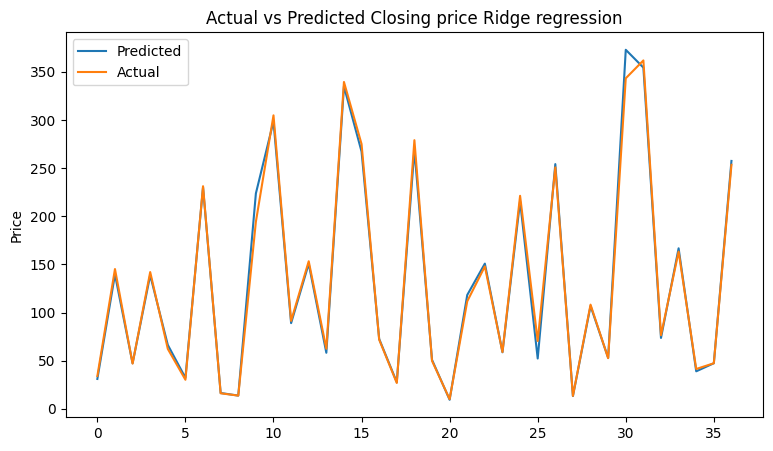

In [60]:
# Plotting predicted and actual target variable values.
plt.figure(figsize=(9,5))
plt.plot(10**y_pred_ridge)
plt.plot(np.array(10**y_test))
plt.legend(["Predicted","Actual"])
plt.ylabel("Price")
plt.title("Actual vs Predicted Closing price Ridge regression")

# 4. Elastic-Net Regression with cross validation.

In [61]:
# importing and initializing Elastic-Net Regression.
from sklearn.linear_model import ElasticNet
elasticnet_model = ElasticNet(alpha=0.1, l1_ratio=0.5)

# initializing parameter grid.
elastic_net_param_grid = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,0.001,0.01,0.02,0.03,0.04,1,5,10,20,40,50,60,100],
                          'l1_ratio':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]}

# cross-validation.
elasticnet_regressor = GridSearchCV(elasticnet_model, elastic_net_param_grid, scoring='neg_mean_squared_error',cv=5)
elasticnet_regressor.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=ElasticNet(alpha=0.1),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.001, 0.01, 0.02, 0.03, 0.04, 1, 5,
                                   10, 20, 40, 50, 60, 100],
                         'l1_ratio': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                      0.9]},
             scoring='neg_mean_squared_error')

In [62]:
# finding the best parameter
elasticnet_regressor.best_params_

{'alpha': 0.0001, 'l1_ratio': 0.1}

In [63]:
# finding the best score for the optimal parameter.
elasticnet_regressor.best_score_

-0.0011528695836730079

In [64]:
# making the predictions.
y_pred_elastic_net = elasticnet_regressor.predict(x_test)

In [65]:
MAE_elastic_net = round(mean_absolute_error(10**(y_test),10**(y_pred_elastic_net)),4)
print(f"Mean Absolute Error : {MAE_elastic_net}")

MSE_elastic_net  = round(mean_squared_error(10**(y_test),10**(y_pred_elastic_net)),4)
print("Mean squared Error :" , MSE_elastic_net)

RMSE_elastic_net = round(np.sqrt(MSE_elastic_net),4)
print("Root Mean squared Error :" ,RMSE_elastic_net)

R2_elastic_net = round(r2_score(10**(y_test), (10**y_pred_elastic_net)),4)
print("R2 score :" ,R2_elastic_net)

Adjusted_R2_elastic_net = round(1-(1-r2_score(10**y_test, 10**y_pred_elastic_net))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)),4)
print("Adjusted R2 score: ", Adjusted_R2_elastic_net)

Mean Absolute Error : 4.8483
Mean squared Error : 70.1569
Root Mean squared Error : 8.376
R2 score : 0.9938
Adjusted R2 score:  0.9932


In [66]:
# storing these metrics in our dataframe.
elastic_net_metric_list = [MAE_elastic_net,MSE_elastic_net,RMSE_elastic_net,R2_elastic_net,Adjusted_R2_elastic_net]
metric_df['Elastic Net'] = elastic_net_metric_list

Text(0.5, 1.0, 'Actual vs Predicted Closing price Elastic Net regression')

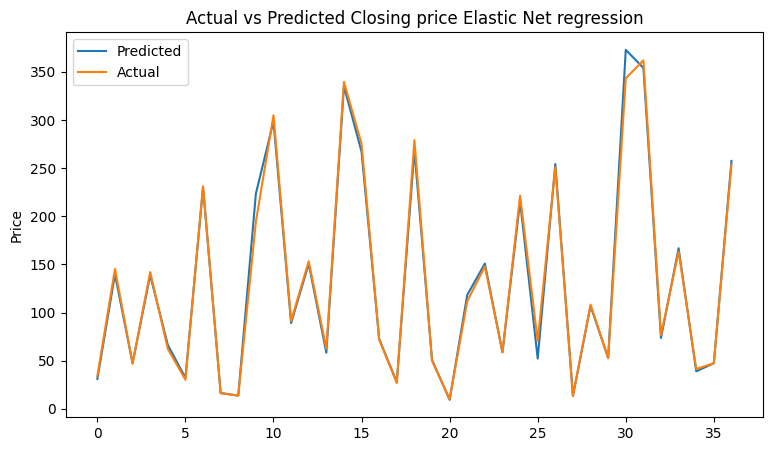

In [67]:
# Now let us plot the actual and predicted target variables values.
plt.figure(figsize=(9,5))
plt.plot(10**y_pred_elastic_net)
plt.plot(np.array(10**y_test))
plt.legend(["Predicted","Actual"])
plt.ylabel("Price")
plt.title("Actual vs Predicted Closing price Elastic Net regression")

In [68]:
# comparing the performance of all models that we have implemented.
metric_df

,Metric,Linear Regression,Lasso,Ridge,Elastic Net
0,Mean Absolute Error,4.8168,4.8262,4.8334,4.8483
1,Mean squared Error,70.4204,70.3311,70.2641,70.1569
2,Root Mean squared Error,8.3917,8.3864,8.3824,8.3760
3,R2 score,0.9937,0.9938,0.9938,0.9938
4,Adjusted R2 score,0.9930,0.9932,0.9932,0.9932


From above data, we can clearly see that the best performing model is Elastic Net as it scores the best in every single metric.

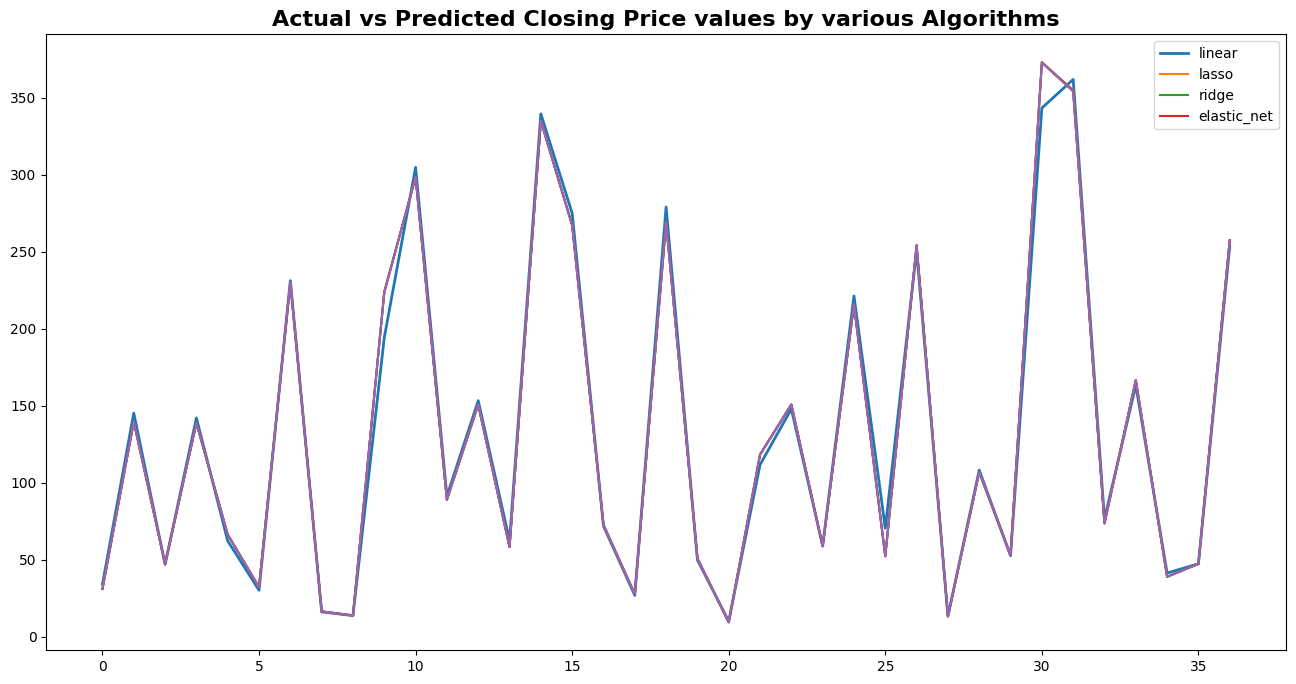

In [69]:
# Plotting the predicted values of all the models against the true values.
plt.figure(figsize=(16,8))
plt.plot(10**y_test, linewidth=2)
plt.plot(10**y_pred_linear)
plt.plot(10**y_pred_lasso)
plt.plot(10**y_pred_ridge)
plt.plot(10**y_pred_elastic_net)
plt.legend(['linear','lasso','ridge','elastic_net'])
plt.title('Actual vs Predicted Closing Price values by various Algorithms', weight = 'bold',fontsize=16)
plt.show()

As we can see from above graph, all of our models are performing really well and are able to closely approximate the actual values.

Text(0.5, 1.0, 'Actual Test data vs Residuals (Elastic Net)')

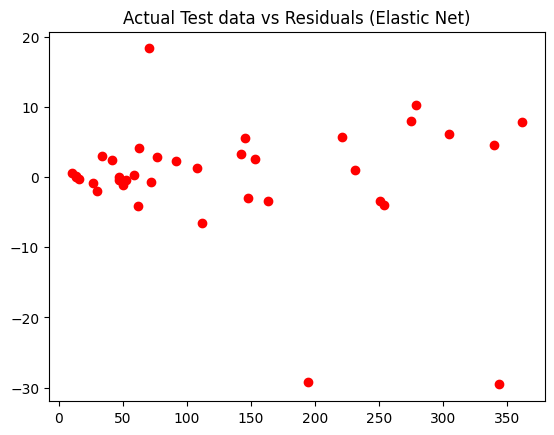

In [70]:
# Lets check for Heterodasticity. Homoscedasticity is an assumption in linear regression algorithm.
# Homoscedasticity means that the model should perform well on all the datapoints.

# Plotting the residuals(errors) against actual test data.
residuals = 10**y_test - 10**y_pred_elastic_net.reshape(37,1)
plt.scatter(10**y_test,residuals,c='red')
plt.title('Actual Test data vs Residuals (Elastic Net)')


In the above graph, we have plotted the residuals against test set value for our actual test set values for our best performing model (Elastic Net Regressor).

As we can see, there is no discernable pattern here in the plot. The errors are similar for all datapoints and the model is performing equally well on all datapoints. So we can say that the assumption of Homoscedasticity is valid in this case.

In [71]:
# saving the actual and elastic net predicted target variables values in a dataframe.
actual_pred_df = pd.DataFrame(10**y_test,10**y_pred_elastic_net).reset_index().rename(columns = {'index':'Actual values',0:'Elastic Net Predicted values'})
actual_pred_df.head()

,Actual values,Elastic Net Predicted values
0,31.028830,34.06
1,139.679454,145.23
2,47.363478,46.95
3,138.780371,142.08
4,66.309870,62.22


# Conclusions


*   Using data visualization on our target variable, we can clearly see the impact of 2018 fraud case involving Rana Kapoor as the stock prices decline dramatically during that period.
*   After loading the dataset, we found that there are no null values in our dataset nor any duplicate data.
*   There are some outliers in our features however this being a very small dataset, dropping those instances will lead to loss of information.
*   We found that the distribution of all our variables is positively skewed. so we performed log transformation on them.
*   There is a high correlation between the dependent and independent variables. This is a signal that our dependent variable is highly dependent on our features and can be predicted accurately from them.
*   We found that there is a rather high correlation between our independent variables. This multicollinearity is however unavoidable here as the dataset is very small.
*   We implemented several models on our dataset in order to be able to predict the closing price and found that all our models are performing remarkably well and Elastic Net regressor is the best performing model with Adjusted R2 score value of 0.9932 and scores well on all evaluation metrics.
*   All of the implemented models performed quite well on our data giving us the Adjusted R-square of over 99%.
*   We checked for presence of Heterodasceticity in our dataset by plotting the residuals against the Elastic Net model predicted value and found that there is no Heterodasceticity present. Our model is performing well on all data-points.
*   With our model making predictions with such high accuracy, we can confidently deploy this model for further predictive tasks using future data.








